### 1.載入套件

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D , AveragePooling2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

In [2]:
from IPython.display import Image

### 2. 匯入資料並進行處理

In [2]:
# Load Fashine MNIST
(X_train, y_train0), (X_test, y_test0) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(60000,28,28,1)/255
X_test = X_test.reshape(10000,28,28,1)/255

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

### 3.建構模型 

In [3]:
f_1 = Conv2D(16,(3,3),padding='same',activation= 'relu')
f_2 = MaxPooling2D(pool_size=(2,2),padding='same')
f_3 = Conv2D(32,(3,3),padding='same',activation= 'relu')

f_4_1 = MaxPooling2D(pool_size=(2,2),padding='same', data_format=None)
f_5_1 = Conv2D(128,(3,3),padding='same',activation= 'relu')
f_6_1 = MaxPooling2D(pool_size=(2,2),padding='same', data_format=None)


f_4_2 = AveragePooling2D(pool_size=(2, 2 ),padding='same', data_format=None)
f_5_2 = Conv2D(128,(3,3),padding='same',activation= 'relu')
f_6_2 = AveragePooling2D(pool_size=(2, 2 ),padding='same', data_format=None)

f_7 = Flatten()
f_8 = Dense(30, activation='relu')
f_9 = Dense(10, activation='softmax')

In [4]:
x = Input(shape=(28,28,1))

In [5]:
print(x)

Tensor("input_1:0", shape=(None, 28, 28, 1), dtype=float32)


In [6]:
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_2)
h_4_1 = f_4_1(h_3)
h_5_1 = f_5_1(h_4_1)
h_6_1 = f_6_1(h_5_1)

h_4_2 = f_4_2(h_3)
h_5_2 = f_5_1(h_4_2)
h_6_2 = f_6_1(h_5_2)

h_7 = concatenate([h_6_1, h_6_2])
h_8 = f_7(h_7)
h_9 = f_8(h_8)
y= f_9(h_9)

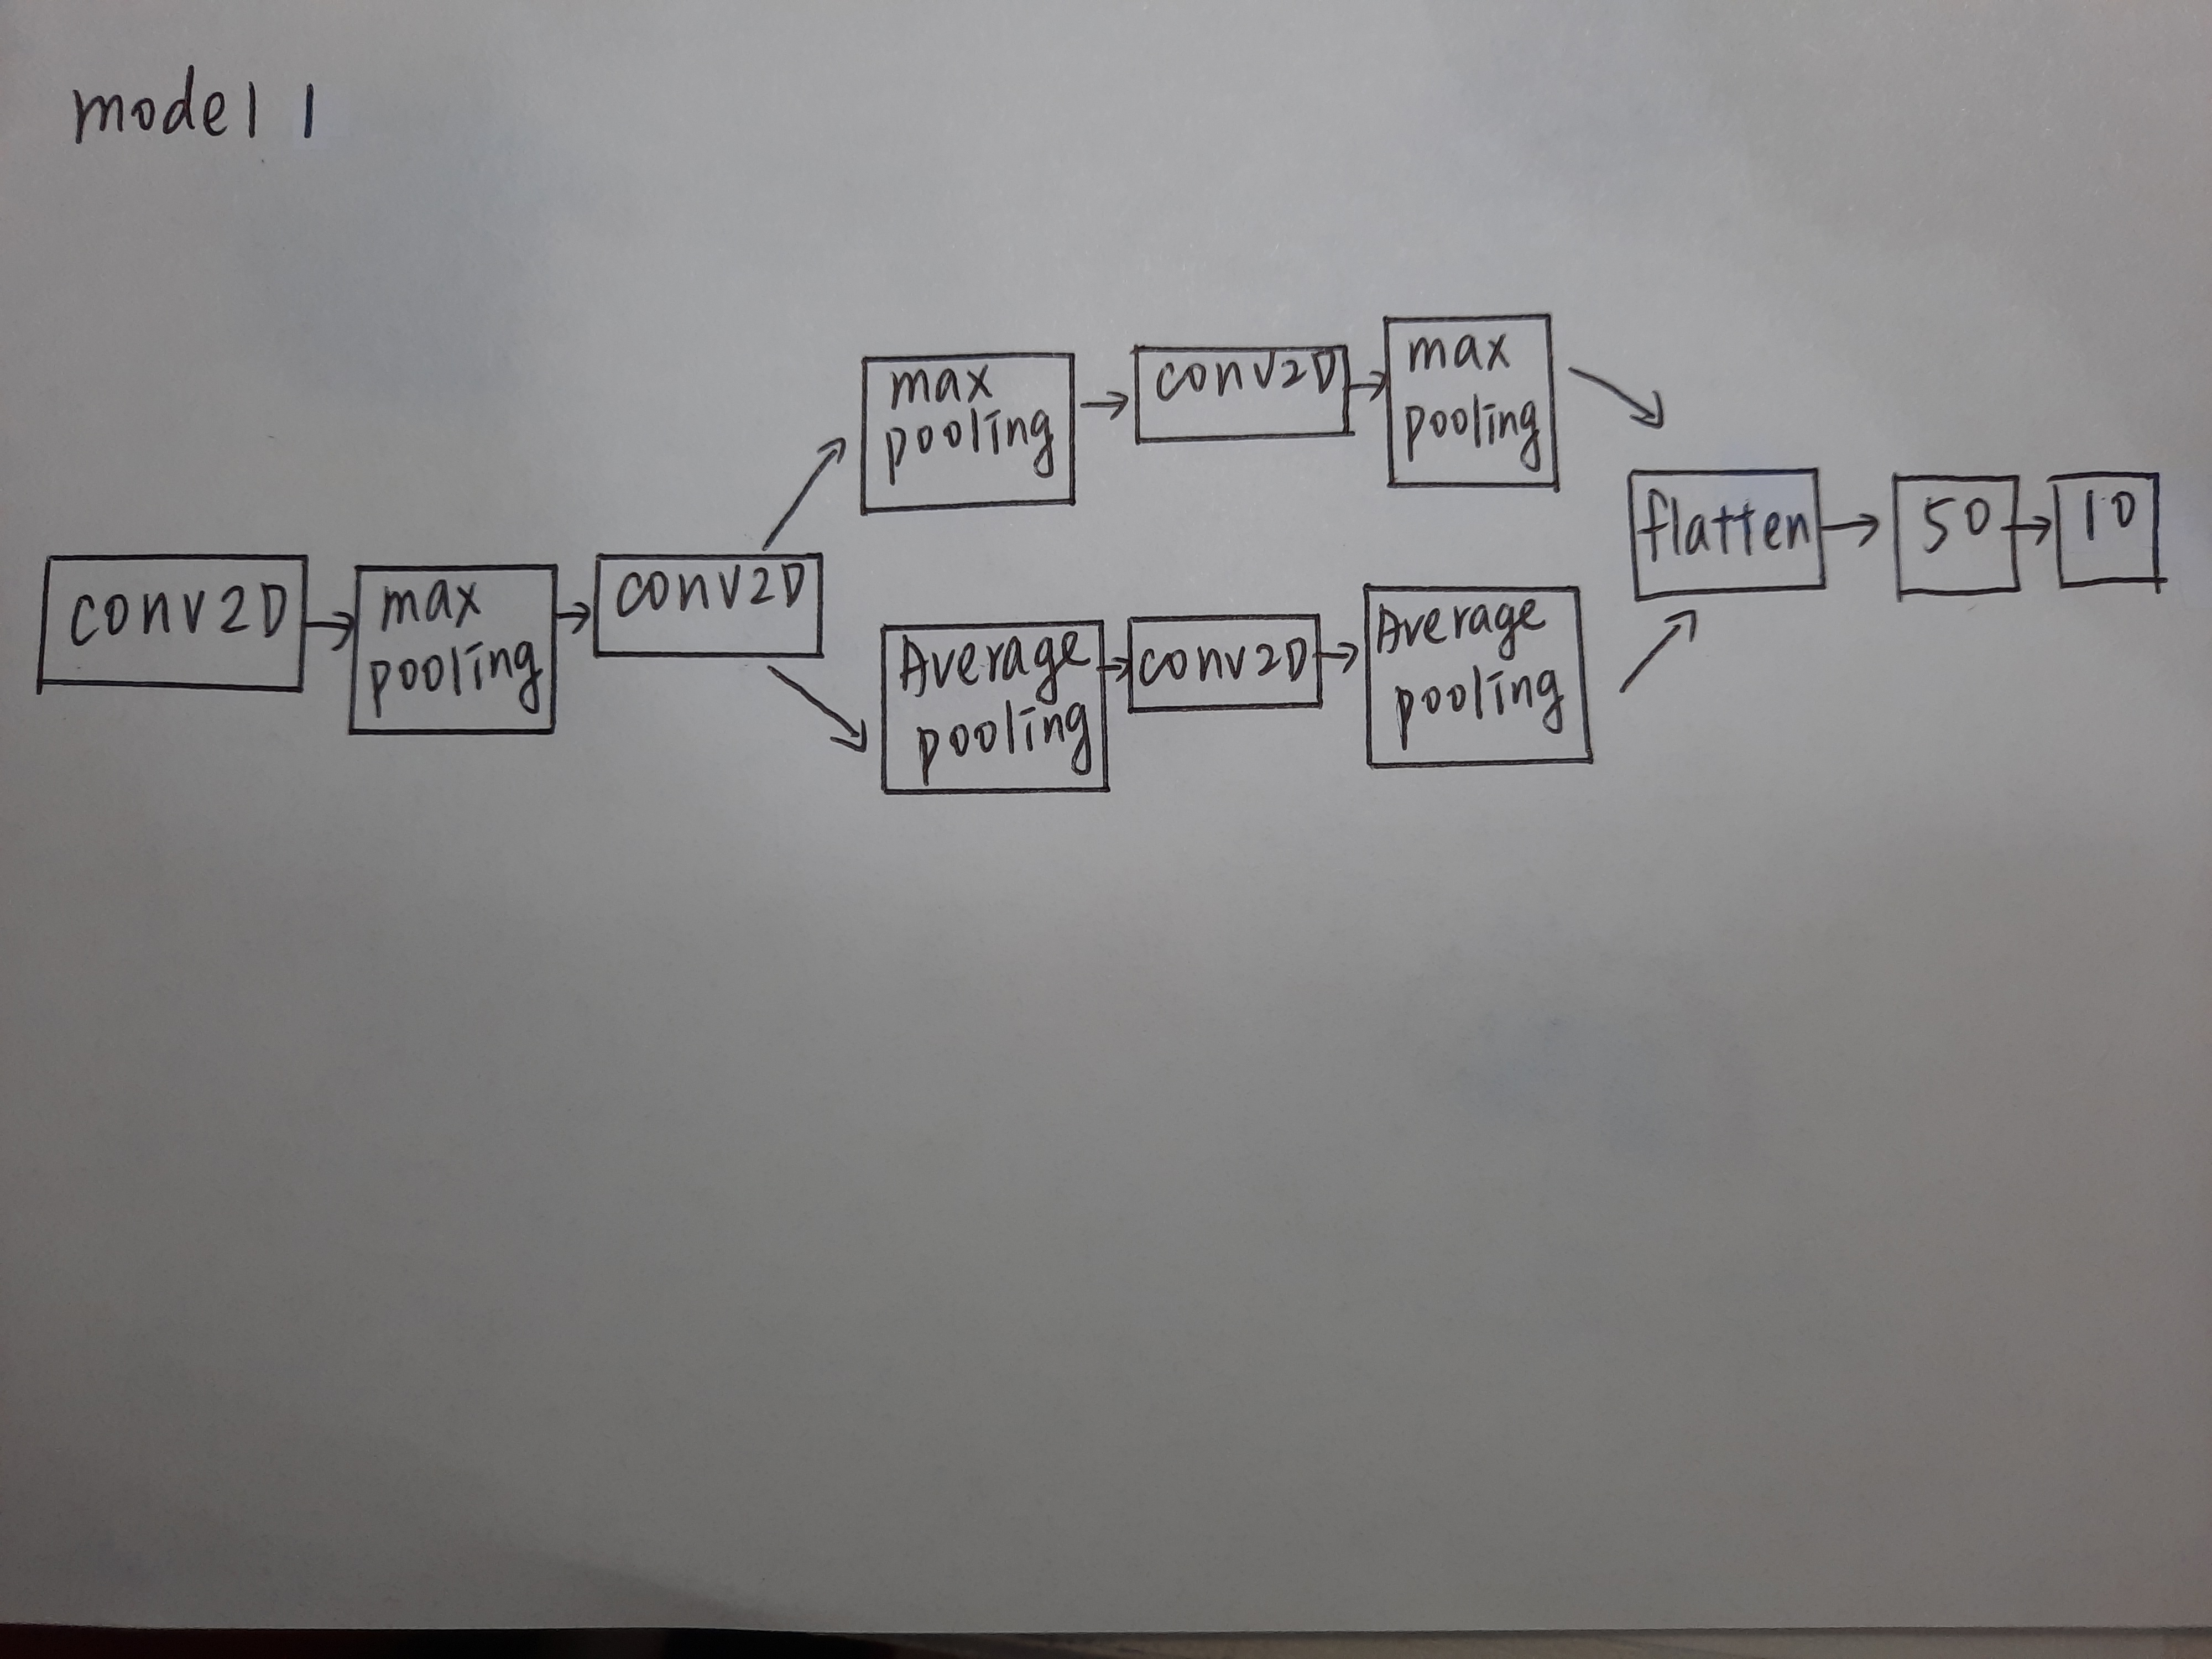

In [5]:
Image(r"C:\Users\ena88\Desktop\AI_course_project\20200620_200858.jpg", width=500, height=500)

In [7]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 14, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 32)   4640        max_pooling2d[0][0]              
______________________________________________________________________________________________

In [8]:
model.compile(loss= "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [9]:
model.fit(X_train,y_train,batch_size=50,epochs=10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 60s 1ms/sample - loss: 0.5102 - accuracy: 0.8191 - val_loss: 0.3572 - val_accuracy: 0.8767
Epoch 2/10
60000/60000 [==============================] - 59s 980us/sample - loss: 0.3177 - accuracy: 0.8856 - val_loss: 0.3196 - val_accuracy: 0.8838
Epoch 3/10
60000/60000 [==============================] - 60s 997us/sample - loss: 0.2706 - accuracy: 0.9015 - val_loss: 0.2804 - val_accuracy: 0.8971
Epoch 4/10
60000/60000 [==============================] - 59s 983us/sample - loss: 0.2401 - accuracy: 0.9124 - val_loss: 0.2678 - val_accuracy: 0.9026
Epoch 5/10
60000/60000 [==============================] - 59s 982us/sample - loss: 0.2161 - accuracy: 0.9211 - val_loss: 0.2455 - val_accuracy: 0.9099
Epoch 6/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.1960 - accuracy: 0.9279 - val_loss: 0.2486 - val_accuracy: 0.9112
Epoch 7/10
60000/60000 [========================

In [10]:
model.save("myCNNFunctionalAPImodel.h1")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: myCNNFunctionalAPImodel.h1\assets


### 4.建構模型二

In [11]:
f_1_1 = Conv2D(16,(3,3),padding='same',activation= 'relu')
f_2_1 = MaxPooling2D(pool_size=(2,2),padding='same')
f_3_1 = Conv2D(32,(3,3),padding='same',activation= 'relu')

f_4_1_1 = MaxPooling2D(pool_size=(2,2),padding='same', data_format=None)
f_5_1_1 = Conv2D(128,(3,3),padding='same',activation= 'relu')
f_6_1_1 = MaxPooling2D(pool_size=(2,2),padding='same', data_format=None)


f_4_2_1 = AveragePooling2D(pool_size=(2, 2 ),padding='same', data_format=None)
f_5_2_1 = Conv2D(128,(3,3),padding='same',activation= 'relu')
f_6_2_1 = AveragePooling2D(pool_size=(2, 2 ),padding='same', data_format=None)

f_7_1 = Flatten()
f_8_1 = Dense(50, activation='relu')
f_9_1 = Dense(50, activation='relu') #與模型一相比多加這一層
f_10_1 = Dense(10, activation='softmax')

In [12]:
x = Input(shape=(28,28,1))

In [13]:
print(x)

Tensor("input_2:0", shape=(None, 28, 28, 1), dtype=float32)


In [14]:
h_1 = f_1_1(x)
h_2 = f_2_1(h_1)
h_3 = f_3_1(h_2)
h_4_1 = f_4_1_1(h_3)
h_5_1 = f_5_1_1(h_4_1)
h_6_1 = f_6_1_1(h_5_1)

h_4_2 = f_4_2_1(h_3)
h_5_2 = f_5_1_1(h_4_2)
h_6_2 = f_6_1_1(h_5_2)

h_7 = concatenate([h_6_1, h_6_2])
h_8 = f_7_1(h_7)
h_9 = f_8_1(h_8)
h_10 = f_9_1(h_9)
y= f_10_1(h_10)

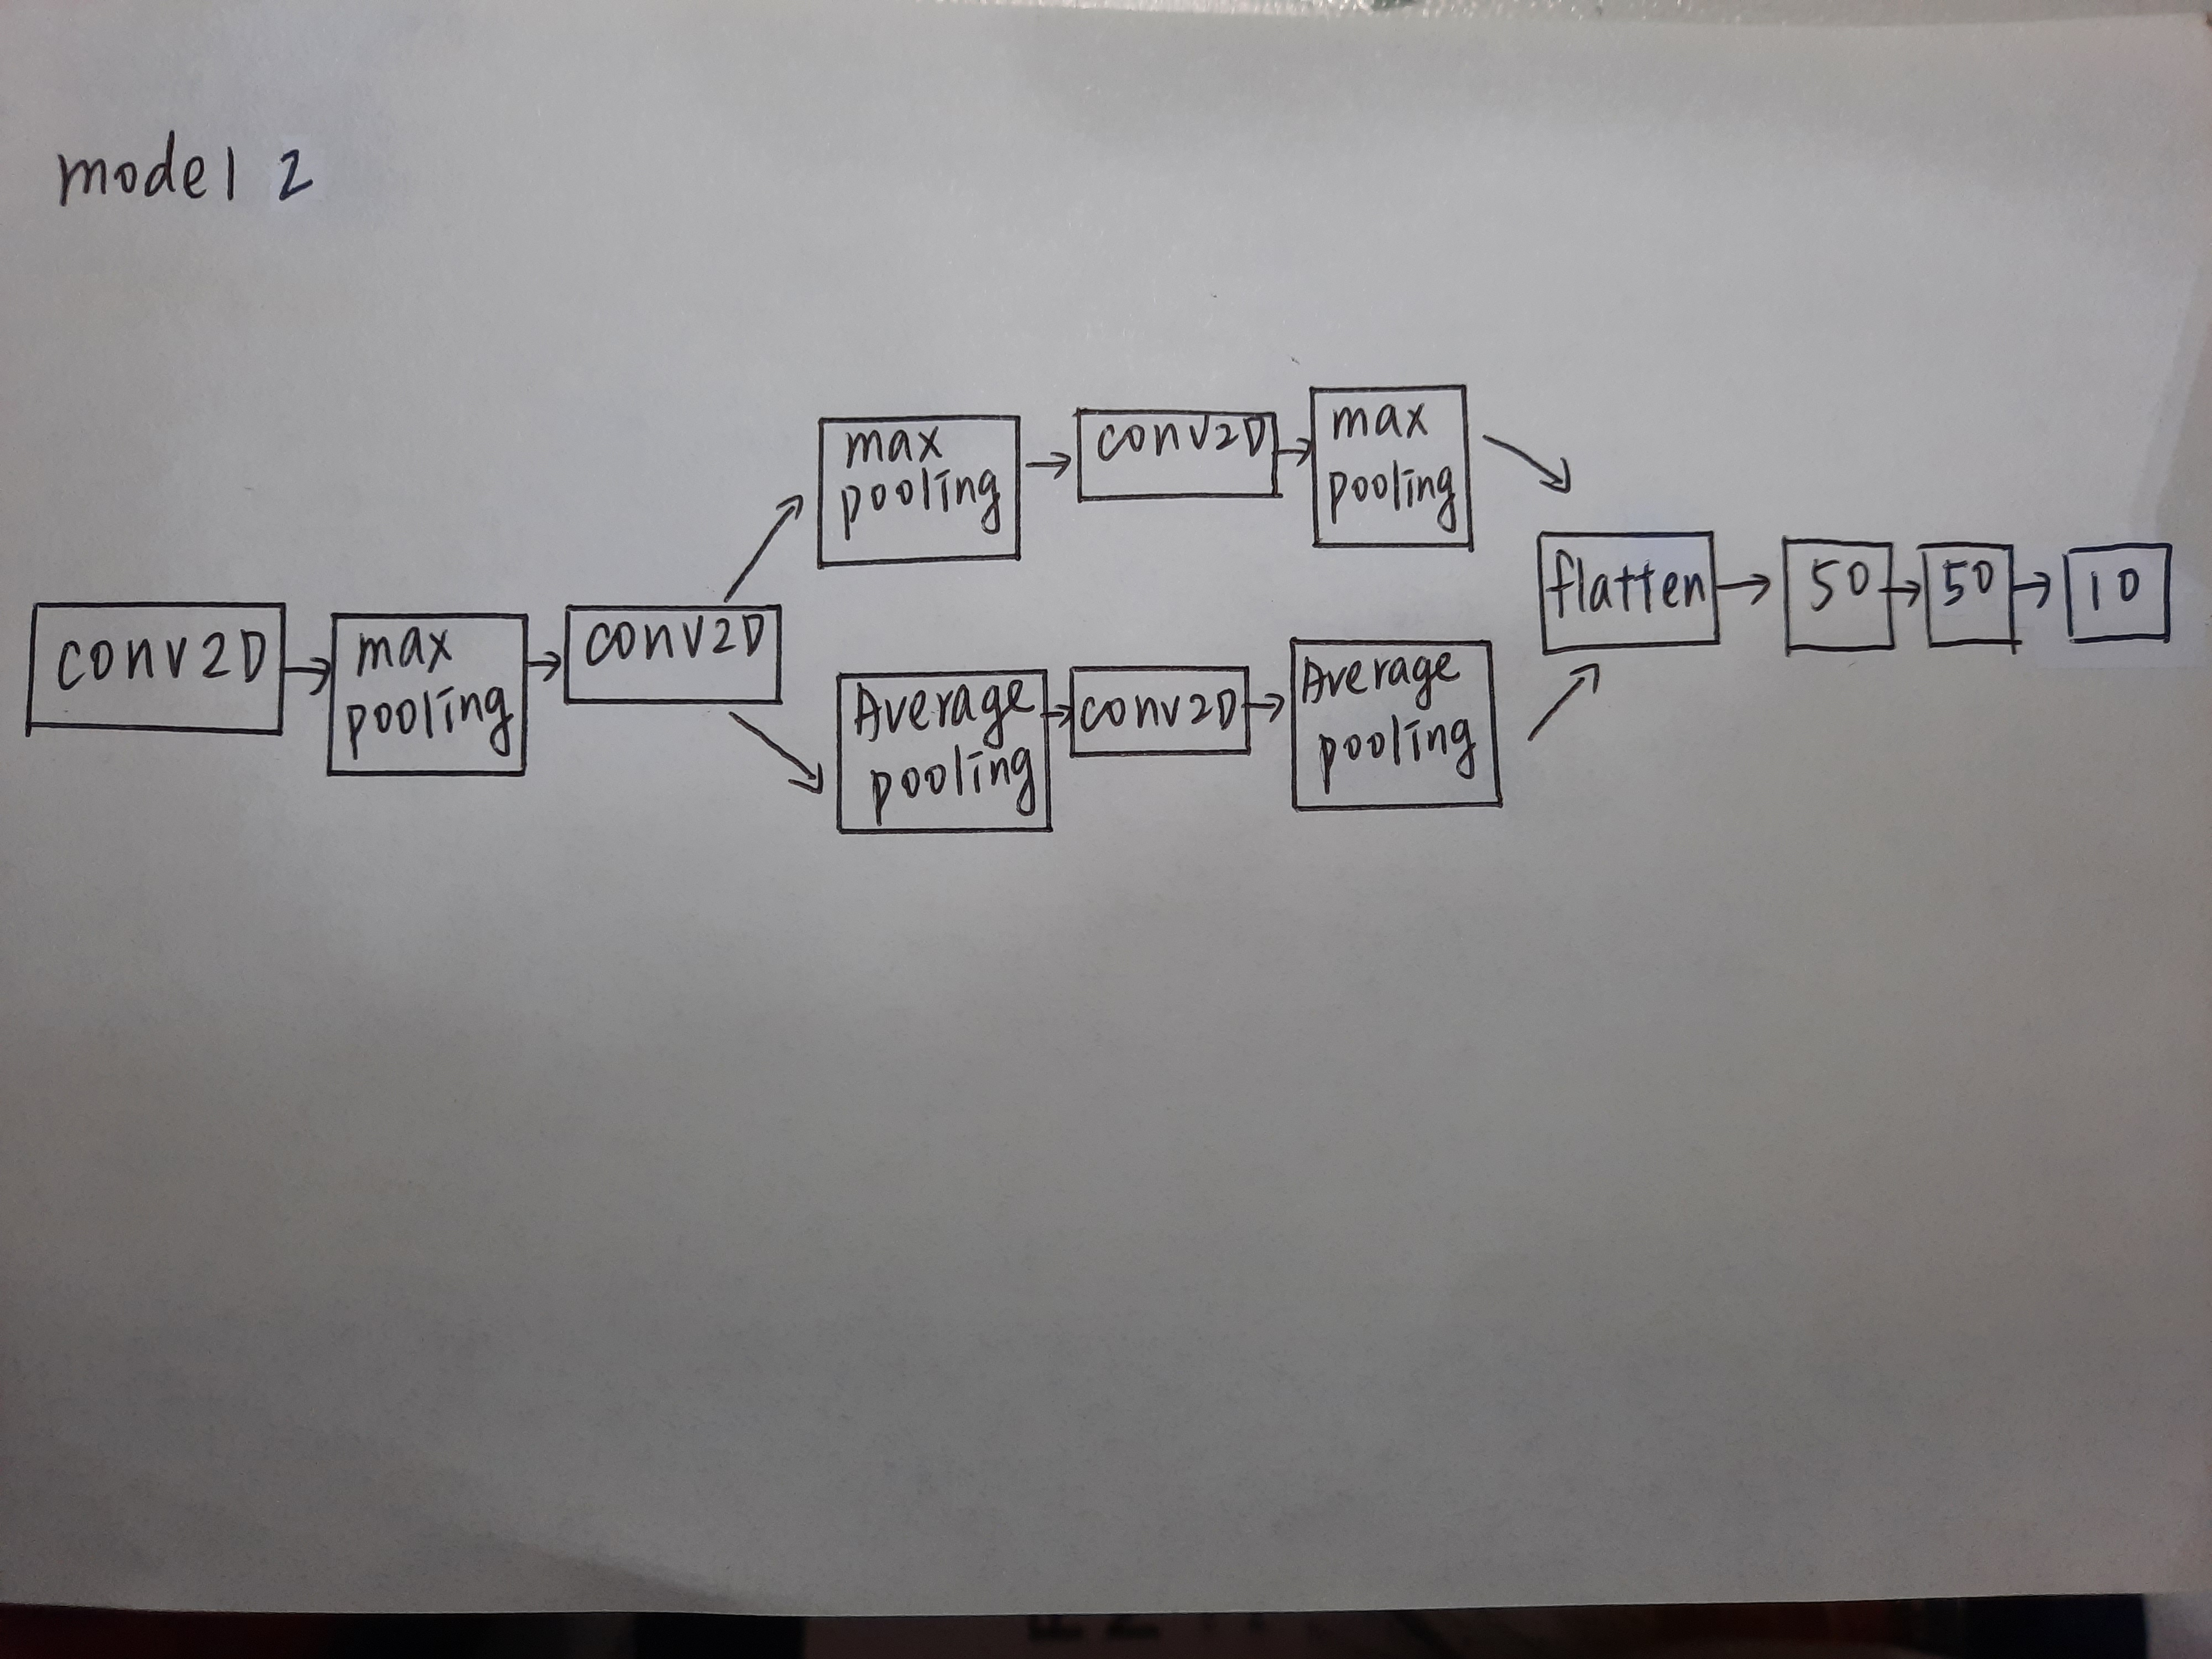

In [6]:
Image(r"C:\Users\ena88\Desktop\AI_course_project\20200620_200952.jpg", width=500, height=500)

In [15]:
model2 = Model(x, y)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 16)   160         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 14, 14, 16)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 14, 14, 32)   4640        max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [16]:
model2.compile(loss= "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
model2.fit(X_train,y_train,batch_size=50,epochs=10,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.5088 - accuracy: 0.8149 - val_loss: 0.3729 - val_accuracy: 0.8631
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3111 - accuracy: 0.8862 - val_loss: 0.3165 - val_accuracy: 0.8854
Epoch 3/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.2663 - accuracy: 0.9021 - val_loss: 0.2708 - val_accuracy: 0.8997
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.2375 - accuracy: 0.9119 - val_loss: 0.2780 - val_accuracy: 0.8998
Epoch 5/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.2135 - accuracy: 0.9206 - val_loss: 0.2600 - val_accuracy: 0.9058
Epoch 6/10
60000/60000 [==============================] - 60s 995us/sample - loss: 0.1958 - accuracy: 0.9275 - val_loss: 0.2393 - val_accuracy: 0.9146
Epoch 7/10
60000/60000 [==============================

### 5. 模型比較與結論

* model1與model2的差異：
    model2多了一層dense(50,activation='relu')
* 從模型的訓練結果來看，兩者訓練到最後的準確率無太大差異，而且測試資料的準確率從第七、第八次訓練就沒有再增加了。
* 但兩個模型的準確率有接近95%、測試資料的準確率有91%，這兩個模型在辨識服裝類資料的效果還是不錯的。